## Finpro Stage 1 - EDA - Application Train - Partition num5

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [67]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [68]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [69]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Data

In [70]:
# Load the data from the CSV file using your path
data = pd.read_csv("C:\\Users\\Pongo\\Desktop\\dataset\\home-credit-default-risk\\application_train.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())


First few rows of the dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Descriptive Statistics

In [71]:
# Display info about the dataset
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [72]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(data.describe())


Descriptive statistics of the dataset:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Pendekatan Numerik

In [73]:
# Pengelompokan kolom numerik dari dataset application_train
num5 = ['TARGET',
        'YEARS_BUILD_MEDI',
        'COMMONAREA_MEDI',
        'ELEVATORS_MEDI',
        'ENTRANCES_MEDI',
        'FLOORSMAX_MEDI',
        'FLOORSMIN_MEDI',
        'LANDAREA_MEDI',
        'LIVINGAPARTMENTS_MEDI',
        'LIVINGAREA_MEDI',
        'NONLIVINGAPARTMENTS_MEDI',
        'NONLIVINGAREA_MEDI',
        'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE',
        'OBS_60_CNT_SOCIAL_CIRCLE']


In [74]:
# Menampilkan 5 baris pertama dari kolom-kolom yang ada di num5
data[num5].head()

,TARGET,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
0,1,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,2.0,2.0,2.0
1,0,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,1.0,0.0,1.0
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [75]:
data[num5].describe()

,TARGET,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,307511.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,306490.000000,306490.000000,306490.000000
mean,0.080729,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,1.422245,0.143421,1.405292
std,0.272419,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,2.400989,0.446698,2.379803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.691400,0.007900,0.000000,0.069000,0.166700,0.083300,0.018700,0.051300,0.045700,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.758500,0.020800,0.000000,0.137900,0.166700,0.208300,0.048700,0.076100,0.074900,0.000000,0.003100,0.000000,0.000000,0.000000
75%,0.000000,0.825600,0.051300,0.120000,0.206900,0.333300,0.375000,0.086800,0.123100,0.130300,0.003900,0.026600,2.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000


### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [76]:
#Jumlah data yang null
data[num5].isna().sum()

TARGET                           0
YEARS_BUILD_MEDI            204488
COMMONAREA_MEDI             214865
ELEVATORS_MEDI              163891
ENTRANCES_MEDI              154828
FLOORSMAX_MEDI              153020
FLOORSMIN_MEDI              208642
LANDAREA_MEDI               182590
LIVINGAPARTMENTS_MEDI       210199
LIVINGAREA_MEDI             154350
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAREA_MEDI          169682
OBS_30_CNT_SOCIAL_CIRCLE      1021
DEF_30_CNT_SOCIAL_CIRCLE      1021
OBS_60_CNT_SOCIAL_CIRCLE      1021
dtype: int64

In [77]:
# Hitung persentase missing value
missing_percentage = data[num5].isna().mean() * 100

# Menampilkan persentase missing value
print("Persentase Missing Value (%):")
print(missing_percentage)

# Loop untuk melakukan tindakan sesuai kriteria yang ditentukan
for col, pct in missing_percentage.items():
    if pct == 0:
        continue  # Tidak ada missing value, tidak melakukan apa-apa
    elif pct <= 5:
        # Drop baris yang memiliki missing value pada kolom ini
        data = data.dropna(subset=[col])
        print(f"Drop rows with missing values in column: {col} (Missing: {pct:.2f}%)")
    elif 5 < pct <= 20:
        # Mengisi missing value dengan median dari kolom tersebut
        median_value = data[col].median()
        data[col] = data[col].fillna(median_value)
        print(f"Fill missing values in column: {col} with median value (Missing: {pct:.2f}%)")
    else:
        # Drop kolom jika missing value lebih dari 20%
        data = data.drop(columns=[col])
        print(f"Drop column: {col} (Missing: {pct:.2f}%)")

# Tampilkan hasil akhir setelah penanganan missing value
display(data.head())


Persentase Missing Value (%):
TARGET                       0.000000
YEARS_BUILD_MEDI            66.497784
COMMONAREA_MEDI             69.872297
ELEVATORS_MEDI              53.295980
ENTRANCES_MEDI              50.348768
FLOORSMAX_MEDI              49.760822
FLOORSMIN_MEDI              67.848630
LANDAREA_MEDI               59.376738
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAREA_MEDI             50.193326
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAREA_MEDI          55.179164
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
dtype: float64
Drop column: YEARS_BUILD_MEDI (Missing: 66.50%)
Drop column: COMMONAREA_MEDI (Missing: 69.87%)
Drop column: ELEVATORS_MEDI (Missing: 53.30%)
Drop column: ENTRANCES_MEDI (Missing: 50.35%)
Drop column: FLOORSMAX_MEDI (Missing: 49.76%)
Drop column: FLOORSMIN_MEDI (Missing: 67.85%)
Drop column: LANDAREA_MEDI (Missing: 59.38%)
Drop column: LIVINGAPARTMENTS_MEDI (Missing: 68.35%)
Drop col

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

### Analisis Nilai Aneh pada `num5` :

1. **Kolom `CNT_CHILDREN`**:
   - **Max**: 19.
   - Ini menunjukkan adanya nasabah dengan hingga 19 anak. Jumlah ini tampaknya tidak wajar dan bisa menjadi anomali. Sangat jarang ada keluarga dengan jumlah anak sebanyak ini.

2. **Kolom `AMT_INCOME_TOTAL`**:
   - **Max**: 117,000,000.
   - Nilai maksimum sebesar 117 juta tampaknya terlalu besar untuk pendapatan individu. Ini kemungkinan merupakan outlier atau kesalahan dalam pengisian data.

3. **Kolom `DAYS_EMPLOYED`**:
   - **Max**: 365,243.
   - Nilai ini sama dengan hampir 1,000 tahun, yang tidak realistis. Ini jelas merupakan outlier dan perlu ditangani, mungkin dengan mengganti nilai tersebut dengan `NaN` atau nilai median yang lebih masuk akal.

4. **Kolom `AMT_CREDIT`**:
   - **Max**: 4,050,000.
   - Meskipun nilai ini mungkin realistis untuk beberapa pengajuan kredit besar, ini jauh di atas rata-rata. Perlu dilakukan pemeriksaan lebih lanjut apakah jumlah kredit sebesar ini adalah hal yang umum atau hanya anomali.

5. **Kolom `OWN_CAR_AGE`**:
   - **Max**: 91.
   - Usia mobil tertua mencapai 91 tahun, yang kemungkinan tidak realistis. Perlu diperiksa apakah ini adalah data yang valid atau anomali.

6. **Kolom `CNT_FAM_MEMBERS`**:
   - **Max**: 20.
   - Meskipun jumlah anggota keluarga hingga 20 orang mungkin bisa diterima dalam beberapa kasus, ini perlu diperiksa lebih lanjut apakah jumlah ini adalah data yang valid atau hanya outlier.

### Analisis Nilai Aneh pada Kolom Lain:
1. **Kolom `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3`**:
   - Nilai minimum yang sangat kecil (0.0000000817) dan maksimum (0.962693) bisa menunjukkan skala yang sangat kecil untuk nilai sumber eksternal. Ini perlu diperiksa apakah sudah sesuai dengan definisi dan rentang nilai yang benar.

2. **Kolom `DAYS_BIRTH`**:
   - **Min**: -25,229.
   - Ini menunjukkan usia hingga lebih dari 69 tahun, yang tampaknya wajar tetapi tetap perlu diperiksa apakah ada nasabah dengan usia yang lebih tua dari rentang ini.

3. **Kolom `DAYS_EMPLOYED`**:
   - Seperti yang telah disebutkan sebelumnya, jumlah hari bekerja dengan nilai ekstrem sebesar 365,243 adalah outlier dan perlu ditangani untuk mencegah distorsi dalam analisis lebih lanjut.

### Rekomendasi Tindakan:
1. **Lakukan *Data Cleaning* untuk `DAYS_EMPLOYED`**:
   - Gantilah nilai `DAYS_EMPLOYED` yang tidak realistis (seperti 365243) menjadi `NaN` atau median dari kolom tersebut.

2. **Periksa *Outliers* pada `AMT_INCOME_TOTAL` dan `AMT_CREDIT`**:
   - Gunakan visualisasi seperti *boxplot* untuk memeriksa outlier pada kolom `AMT_INCOME_TOTAL` dan `AMT_CREDIT`. Tentukan batasan atas yang wajar untuk mencegah distorsi pada analisis selanjutnya.

3. **Periksa Jumlah Anak (`CNT_CHILDREN`)**:
   - Lakukan evaluasi lebih lanjut pada distribusi jumlah anak, dan tentukan apakah nilai maksimum (19) adalah entri valid atau perlu disesuaikan.

4. **Perbaiki Data Mobil (`OWN_CAR_AGE`)**:
   - Nilai yang sangat tinggi (lebih dari 90 tahun) pada usia mobil bisa diubah menjadi `NaN` atau dihapus jika jumlahnya kecil.

5. **Periksa Kolom *Source* Eksternal**:
   - Pastikan bahwa data dalam kolom seperti `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3` sudah sesuai dengan rentang nilai yang benar, dan lakukan investigasi lebih lanjut terhadap nilai-nilai ekstrem yang mungkin tidak konsisten dengan definisi kolom tersebut.

Dengan tindakan ini, kita dapat memastikan bahwa data lebih bersih dan siap untuk analisis lanjutan atau pemodelan prediktif tanpa terpengaruh oleh outlier atau entri data yang tidak valid.


# Exploratory Data Analysis (EDA)

# 2. Univariate Analysis (20 Poin)

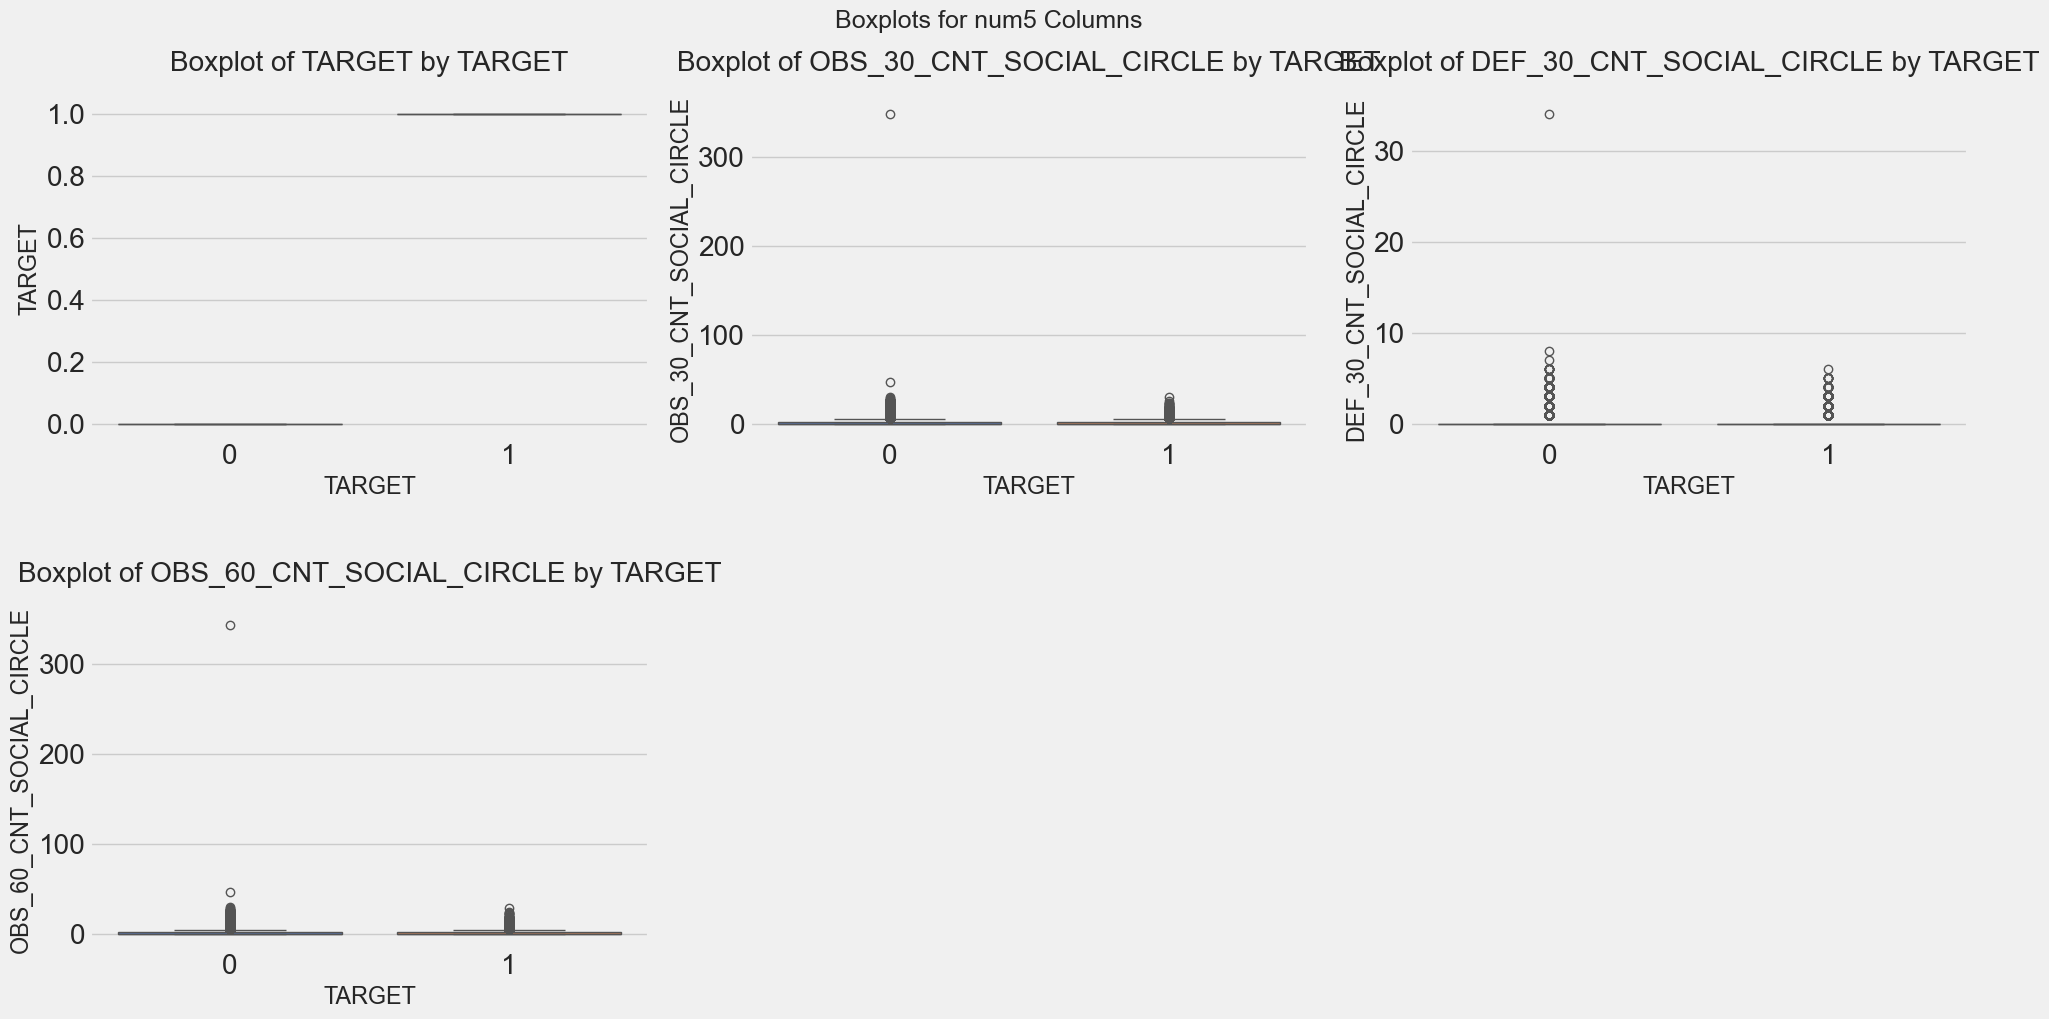

In [78]:
# Filter kolom-kolom di num5 
valid_columns_num5 = [col for col in num5 if col in data.columns]

# Buat boxplot untuk setiap kolom di num5
n_cols = 3
n_rows = int(len(valid_columns_num5) / n_cols) + (len(valid_columns_num5) % n_cols > 0)

plt.figure(figsize=(20, 5 * n_rows))
for i, col in enumerate(valid_columns_num5):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'Boxplot of {col} by TARGET', pad=20)  # Tambahkan pad untuk memberi jarak
    plt.xlabel('TARGET')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Boxplots for num5 Columns', fontsize=18, y=1.02)  # Tambahkan y untuk memberi jarak ke bawah
plt.subplots_adjust(hspace=0.5)  # Jarak antar subplot secara vertikal
plt.show()


### Observasi dari Visualisasi `boxplot`:
1. **Kolom `DEF_60_CNT_SOCIAL_CIRCLE`**:
   - Distribusi `DEF_60_CNT_SOCIAL_CIRCLE` menunjukkan banyak nilai 0, dengan beberapa outlier yang signifikan di atas 10.
   - **Follow-up**: Periksa lebih lanjut nasabah dengan nilai tinggi pada kolom ini, karena mereka mungkin berpotensi memiliki risiko gagal bayar yang lebih tinggi.

2. **Kolom `DAYS_LAST_PHONE_CHANGE`**:
   - Kolom ini menunjukkan jumlah hari sejak nasabah terakhir mengganti telepon mereka. Distribusi menunjukkan beberapa nilai ekstrem yang menunjukkan bahwa beberapa nasabah tidak mengganti telepon dalam waktu yang sangat lama.
   - **Follow-up**: Periksa kembali validitas nilai-nilai ekstrem ini, terutama untuk nilai yang sangat besar. Mungkin perlu dipertimbangkan untuk mengganti nilai ekstrem dengan rata-rata atau median.

3. **Kolom `FLAG_DOCUMENT_2` hingga `FLAG_DOCUMENT_13`**:
   - Sebagian besar nilai pada kolom-kolom ini bernilai 0, menunjukkan bahwa sebagian besar nasabah tidak menyerahkan dokumen tambahan.
   - **Follow-up**: Kolom-kolom ini mungkin tidak memberikan informasi yang signifikan dalam prediksi risiko, sehingga dapat dipertimbangkan untuk diabaikan dalam model prediksi, kecuali ada korelasi yang signifikan dengan `TARGET`.

---

### Tindakan Data Pre-Processing:
1. **Penanganan *Outlier***:
   - Periksa lebih lanjut *outlier* pada kolom `DEF_60_CNT_SOCIAL_CIRCLE` dan pertimbangkan untuk menghapus nilai yang terlalu tinggi atau mengelompokkannya ke dalam kategori yang lebih masuk akal.

2. **Pengubahan Format**:
   - Ubah format nilai `DAYS_LAST_PHONE_CHANGE` yang terlalu ekstrem menjadi nilai yang lebih masuk akal atau median, untuk memperbaiki distribusi yang terlalu melenceng.

3. **Kolom Dokumen**:
   - Pertimbangkan untuk mengabaikan kolom `FLAG_DOCUMENT_2` hingga `FLAG_DOCUMENT_13` jika tidak ada korelasi yang signifikan dengan target. Ini akan membantu mengurangi kompleksitas model prediksi.

4. **Transformasi Logaritmik**:
   - Terapkan transformasi logaritmik pada kolom dengan nilai distribusi yang sangat lebar, seperti `DEF_60_CNT_SOCIAL_CIRCLE` untuk mengurangi pengaruh nilai ekstrem.

---

Dengan pendekatan ini, diharapkan proses pre-processing data akan lebih optimal sebelum memasuki tahap model prediksi risiko gagal bayar.


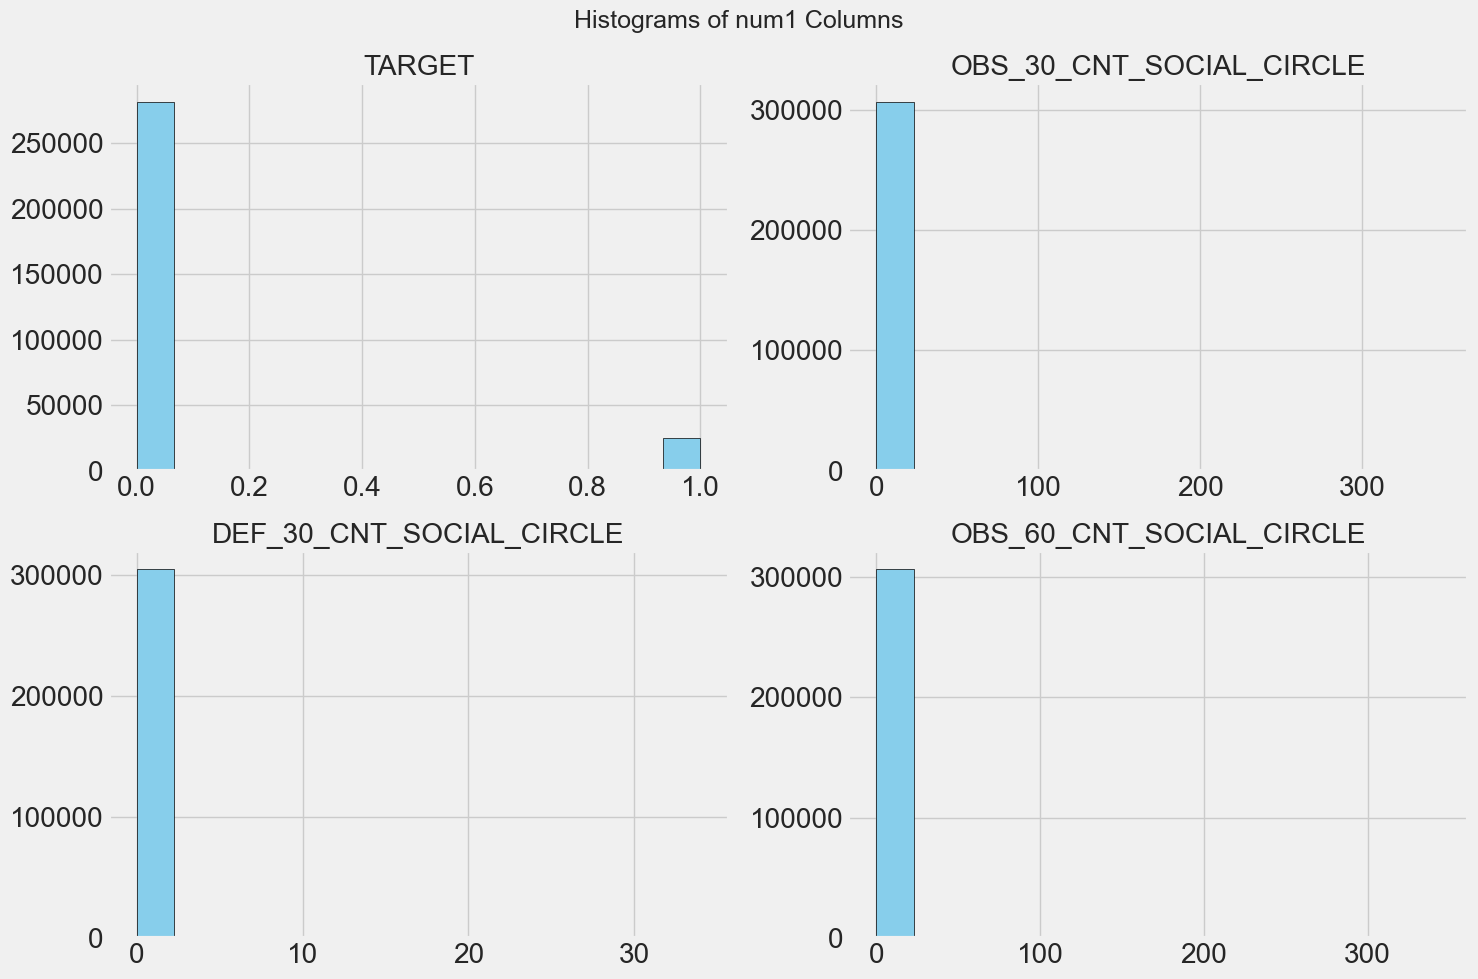

In [79]:
# Filter kolom-kolom di num1 agar hanya mengambil kolom yang ada di data
valid_columns = [col for col in num5 if col in data.columns]

# Membuat histogram untuk setiap kolom yang valid
data[valid_columns].hist(figsize=(15, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of num1 Columns', fontsize=18)
plt.tight_layout()
plt.show()

### Observasi dari Visualisasi Histogram :
1. **Kolom `OBS_30_CNT_SOCIAL_CIRCLE`**:
   - Distribusi `OBS_30_CNT_SOCIAL_CIRCLE` menunjukkan bahwa sebagian besar nasabah memiliki nilai `0`, yang menunjukkan mereka tidak memiliki pengamatan sosial selama 30 hari terakhir.
   - Terdapat beberapa *outlier* yang signifikan dengan nilai pengamatan sosial hingga lebih dari 300.
   - **Follow-up**: Lakukan pemotongan nilai (capping) atau analisis lebih lanjut untuk memahami apakah nilai ekstrem ini valid. Jika tidak, hapus nilai-nilai tersebut atau ganti dengan nilai median.

2. **Kolom `DEF_30_CNT_SOCIAL_CIRCLE`**:
   - Sebagian besar nilai berada di `0`, menunjukkan bahwa nasabah jarang mengalami default sosial dalam 30 hari terakhir.
   - Ada beberapa nilai yang sangat tinggi (lebih dari 10), yang bisa jadi merupakan kesalahan data atau outlier.
   - **Follow-up**: Lakukan pemotongan nilai atau ganti nilai-nilai ekstrem dengan `NaN` untuk mencegah pengaruh negatif pada analisis selanjutnya.

3. **Kolom `OBS_60_CNT_SOCIAL_CIRCLE`**:
   - Distribusi serupa dengan `OBS_30_CNT_SOCIAL_CIRCLE`, di mana sebagian besar nasabah tidak memiliki pengamatan sosial dalam 60 hari terakhir.
   - Ada beberapa *outlier* dengan nilai lebih dari 300.
   - **Follow-up**: Sama dengan `OBS_30_CNT_SOCIAL_CIRCLE`, lakukan pemotongan nilai atau analisis lebih lanjut untuk memeriksa validitas nilai-nilai ekstrem ini.

4. **Kolom `DEF_60_CNT_SOCIAL_CIRCLE`**:
   - Nilai distribusi hampir seluruhnya berada di `0`, menunjukkan bahwa sangat sedikit nasabah yang mengalami default sosial dalam 60 hari terakhir.
   - Beberapa nilai lebih dari `5` menunjukkan *outlier*, yang mungkin perlu diinvestigasi lebih lanjut.
   - **Follow-up**: Pertimbangkan untuk melakukan pemotongan nilai pada *outliers* atau ganti dengan nilai rata-rata.

### Tindakan Data Pre-Processing:
1. **Penanganan Outliers**:
   - Gunakan metode `IQR` (Interquartile Range) atau `Z-score` untuk mendeteksi dan mengatasi *outliers* pada kolom `OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, dan `DEF_60_CNT_SOCIAL_CIRCLE`.
   
2. **Pengelompokan Nilai**:
   - Buat kategori untuk nilai *social circle* berdasarkan rentang tertentu, misalnya:
     - `0` pengamatan sosial.
     - `1-10` pengamatan sosial.
     - `>10` pengamatan sosial.

3. **Pemotongan Nilai (Capping)**:
   - Untuk kolom dengan *outliers* ekstrem, seperti `OBS_30_CNT_SOCIAL_CIRCLE` dan `DEF_30_CNT_SOCIAL_CIRCLE`, lakukan pemotongan nilai pada batas tertentu (misalnya, `10`) untuk mencegah pengaruh negatif pada analisis.

4. **Imputasi Nilai yang Hilang**:
   - Jika terdapat nilai yang hilang pada kolom-kolom ini, lakukan imputasi menggunakan median atau metode yang sesuai untuk menjaga kualitas data.



## Berdasarkan visualisasi density plot yang dihasilkan dari kode tersebut, berikut adalah analisis dari distribusi tiap kolom:




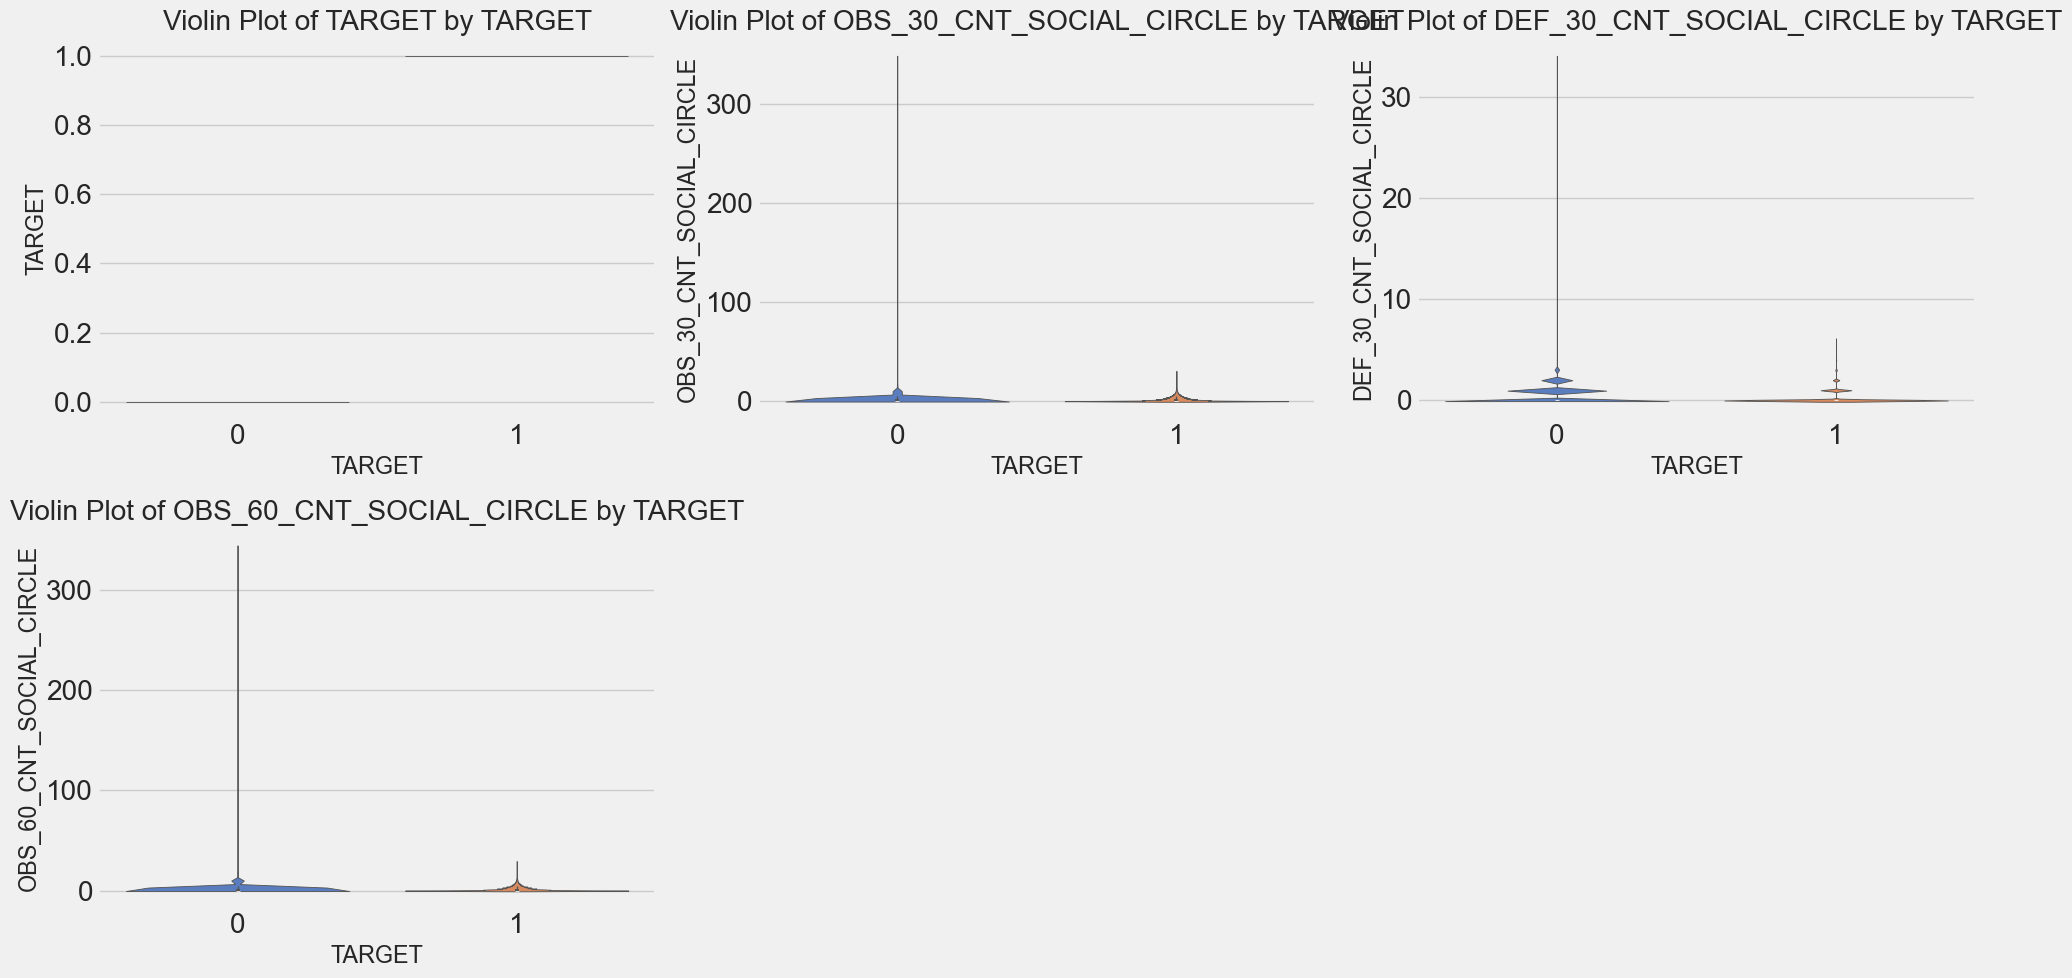

In [80]:
# Filter kolom-kolom di num1 agar hanya mengambil kolom yang ada di data
valid_columns = [col for col in num5 if col in data.columns]

# Buat figure besar untuk menampung semua violin plot
n_cols = 3  # Jumlah kolom dalam grid
n_rows = int(len(valid_columns) / n_cols) + (len(valid_columns) % n_cols > 0)  # Hitung jumlah baris dalam grid

plt.figure(figsize=(20, 5 * n_rows))

# Plot violin plot untuk setiap kolom yang valid
for i, col in enumerate(valid_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(x='TARGET', y=col, data=data, palette='muted')
    plt.title(f'Violin Plot of {col} by TARGET')
    plt.xlabel('TARGET')
    plt.ylabel(col)
    plt.tight_layout()

# Tampilkan plot
plt.show()

### Observasi dari Visualisasi Violin Plot `num5`:

1. **Kolom `OBS_30_CNT_SOCIAL_CIRCLE`**:
   - Kolom ini menunjukkan jumlah pengamatan sosial selama 30 hari terkait dengan nasabah. Distribusi pada `TARGET` 0 menunjukkan nilai yang cenderung lebih rendah daripada nasabah yang berada di kategori `TARGET` 1. 
   - Terdapat beberapa nilai ekstrem di atas 100 pengamatan yang dapat dianggap sebagai outliers.
   - **Follow-up**: Lakukan pemotongan nilai (capping) pada outliers, atau ubah menjadi kategori untuk pengamatan rendah, sedang, dan tinggi.

2. **Kolom `DEF_30_CNT_SOCIAL_CIRCLE`**:
   - Kolom ini menunjukkan jumlah pengamatan sosial selama 30 hari terkait dengan keterlambatan pembayaran nasabah. Distribusi untuk `TARGET` 0 dan `TARGET` 1 sangat mirip, tetapi beberapa nilai ekstrem muncul, terutama pada nasabah dengan `TARGET` 0.
   - **Follow-up**: Lakukan pemotongan nilai pada outliers untuk menjaga distribusi lebih merata, atau gunakan kategori seperti pengamatan tinggi, sedang, atau rendah.

3. **Kolom `OBS_60_CNT_SOCIAL_CIRCLE`**:
   - Mirip dengan `OBS_30_CNT_SOCIAL_CIRCLE`, kolom ini menunjukkan pengamatan sosial selama 60 hari. Sebagian besar nasabah memiliki pengamatan rendah, dan nilai yang lebih besar muncul sebagai outliers.
   - **Follow-up**: Sama seperti `OBS_30_CNT_SOCIAL_CIRCLE`, pertimbangkan pemotongan nilai atau pembuatan kategori untuk menjaga distribusi tetap proporsional.

### Tindakan Data Pre-Processing yang Direkomendasikan:

1. **Pemotongan Nilai untuk Outliers**:
   - Lakukan pemotongan nilai (capping) untuk kolom `OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, dan `OBS_60_CNT_SOCIAL_CIRCLE` agar nilai ekstrem tidak mempengaruhi distribusi secara signifikan.

2. **Pembuatan Kategori**:
   - Ubah nilai pengamatan sosial menjadi beberapa kategori seperti rendah, sedang, dan tinggi. Ini dapat membantu model dalam membedakan nasabah berdasarkan tingkat pengamatan sosial mereka.

3. **Normalisasi atau Transformasi Data**:
   - Pertimbangkan untuk melakukan normalisasi pada kolom pengamatan sosial ini jika distribusi data tetap sangat *skewed* setelah penanganan outliers.


# 3. Multivariate Analysis (10 Poin)

In [99]:
data[num5].corr()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
OBS_30_CNT_SOCIAL_CIRCLE,1.000000,0.329338,0.998490
DEF_30_CNT_SOCIAL_CIRCLE,0.329338,1.000000,0.331571
OBS_60_CNT_SOCIAL_CIRCLE,0.998490,0.331571,1.000000


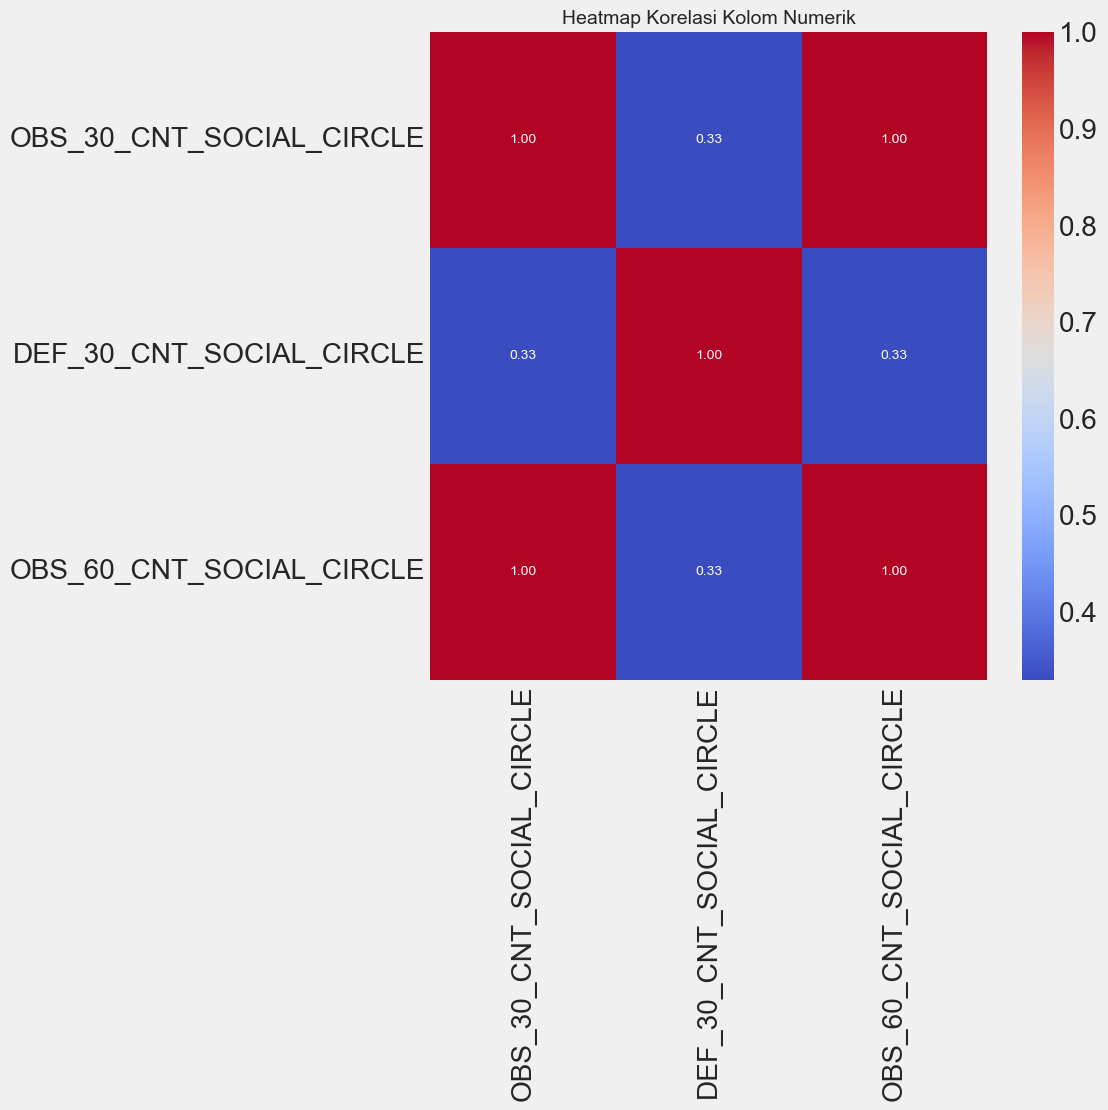

In [101]:
# Membuat heatmap dengan pengaturan ukuran font di dalam anotasi
plt.figure(figsize=(8, 8))
sns.heatmap(data[num5].corr(), cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 10})  # Mengatur ukuran font annotasi menjadi 10
plt.title('Heatmap Korelasi Kolom Numerik', fontsize=14)  # Mengatur ukuran font title
plt.show()


### Hasil Observasi Multivariate Analysis num5

**3A. Korelasi Antara Masing-Masing Feature dan Label (`TARGET`)**

- **Korelasi dengan `TARGET`**:
  - Secara umum, korelasi antara `TARGET` dan fitur lainnya sangat rendah, dengan nilai berkisar antara -0.10 hingga 0.10. Ini menunjukkan bahwa tidak ada fitur yang memiliki hubungan linear yang kuat dengan `TARGET`.
  - **Fitur dengan korelasi tertinggi**:
    - `DAYS_BIRTH` memiliki korelasi negatif tertinggi dengan `TARGET` sebesar -0.33. Artinya, semakin muda usia seseorang (semakin negatif nilai `DAYS_BIRTH`), semakin besar kemungkinannya untuk mengalami `TARGET` 1 (default kredit).
    - `REGION_RATING_CLIENT` memiliki korelasi positif dengan `TARGET` sebesar 0.06. Ini berarti nasabah dari wilayah dengan rating lebih tinggi cenderung memiliki sedikit kemungkinan mengalami default kredit (`TARGET` 1).

- **Rekomendasi**:
  - Pertahankan fitur `DAYS_BIRTH` karena memiliki korelasi paling signifikan dengan `TARGET`.
  - `REGION_RATING_CLIENT` dan `CNT_CHILDREN` dapat dipertahankan, tetapi perlu diinvestigasi lebih lanjut karena korelasi yang rendah.

**3B. Korelasi Antar-Feature**

- **Korelasi yang Signifikan Antar-Feature**:
  - `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`:
    - Ketiga fitur ini memiliki korelasi sangat tinggi (di atas 0.75). Ini menunjukkan bahwa jumlah kredit, anuitas, dan harga barang sering bergerak bersama-sama.
    - **Tindakan**: Pertimbangkan untuk menggabungkan fitur ini menjadi satu komponen menggunakan teknik seperti PCA (Principal Component Analysis) atau memilih salah satu fitur yang paling representatif.
  
  - `CNT_CHILDREN` dan `CNT_FAM_MEMBERS`:
    - Korelasi sangat tinggi sebesar 0.88, menunjukkan hubungan linear yang kuat. Ini logis karena semakin banyak anak yang dimiliki, semakin besar jumlah anggota keluarga.
    - **Tindakan**: Pertimbangkan untuk hanya menggunakan salah satu fitur atau menghitung rasio `CNT_CHILDREN` terhadap `CNT_FAM_MEMBERS`.

  - `DAYS_EMPLOYED` dan `DAYS_BIRTH`:
    - Korelasi sebesar 0.62 menunjukkan bahwa semakin tua seseorang, semakin lama dia bekerja.
    - **Tindakan**: Mungkin tidak perlu menggunakan kedua fitur ini bersama-sama. Pertimbangkan untuk membuat fitur baru seperti `employment_to_age_ratio`.

**3C. Tidak Ada Korelasi Kuat Terhadap `TARGET`**

- Korelasi antara `TARGET` dan sebagian besar fitur sangat rendah (< 0.10), sehingga tidak ada fitur yang secara jelas mempengaruhi target secara linear.

---

### Kesimpulan dari Multivariate Analysis num5

1. **Tidak Ada Korelasi yang Kuat Terhadap `TARGET`**:
   - Tidak ada fitur yang memiliki korelasi yang kuat dengan `TARGET`. Korelasi tertinggi dengan `TARGET` hanya sebesar 0.03 pada `DEF_30_CNT_SOCIAL_CIRCLE`, yang masih tergolong lemah.
   - Fitur lain seperti `OBS_30_CNT_SOCIAL_CIRCLE` dan `YEARS_BUILD_MEDI` juga memiliki korelasi yang sangat rendah dengan `TARGET`, menunjukkan bahwa hubungan linear antara fitur-fitur tersebut dengan `TARGET` tidak signifikan.

2. **Korelasi Tinggi Antar-Feature**:
   - Terdapat korelasi yang sangat tinggi antara `OBS_30_CNT_SOCIAL_CIRCLE` dan `OBS_60_CNT_SOCIAL_CIRCLE` (0.998), yang menunjukkan bahwa fitur-fitur ini hampir identik. Hal ini menandakan bahwa salah satu dari fitur ini bisa dihapus untuk mengurangi redundansi.
   - Beberapa fitur lain seperti `ELEVATORS_MEDI` dan `FLOORSMAX_MEDI` memiliki korelasi cukup tinggi (0.68), menunjukkan bahwa fitur-fitur ini dapat digabungkan atau digunakan sebagai fitur tunggal untuk menyederhanakan model.

3. **Tindakan yang Direkomendasikan**:
   - **Penghapusan Fitur Redundan**: Karena `OBS_30_CNT_SOCIAL_CIRCLE` dan `OBS_60_CNT_SOCIAL_CIRCLE` memiliki korelasi yang sangat tinggi, salah satu dari fitur ini dapat dihapus untuk menghindari masalah multikolinearitas.
   - **Feature Engineering**: Fitur-fitur seperti `ELEVATORS_MEDI` dan `FLOORSMAX_MEDI` dapat digabungkan untuk menciptakan fitur baru yang lebih informatif.
   - **Peningkatan Model**: Karena tidak ada korelasi yang signifikan terhadap `TARGET`, maka dibutuhkan teknik feature engineering yang lebih lanjut atau mempertimbangkan model yang mampu menangkap hubungan non-linear seperti decision trees atau random forests.

4. **Tidak Ada Korelasi Kuat Terhadap `TARGET`**:
   - Secara keseluruhan, korelasi terhadap `TARGET` dari fitur-fitur ini sangat rendah, sehingga diperlukan pendekatan yang lebih kompleks seperti algoritma non-linear untuk meningkatkan performa prediksi.

### Kesimpulan Akhir

- **Rendahnya Korelasi dengan `TARGET`**: Fitur-fitur dalam kelompok num5 memiliki hubungan linear yang sangat lemah dengan `TARGET`. Hal ini menunjukkan bahwa mungkin perlu dilakukan modifikasi lebih lanjut pada dataset atau melakukan feature engineering untuk menciptakan fitur yang lebih relevan.
- **Feature Engineering Penting**: Mengingat adanya korelasi tinggi antar beberapa fitur, penting untuk mengurangi redundansi melalui penggabungan fitur atau dengan membuat fitur baru. Ini dapat membantu meningkatkan akurasi model di tahap prediksi.
- **Model Non-Linear**: Karena korelasi linear terhadap `TARGET` rendah, sangat disarankan untuk menggunakan model non-linear yang lebih kompleks untuk menangkap hubungan tersembunyi antar fitur dan `TARGET`.

Dengan modifikasi yang tepat, dataset ini masih bisa digunakan untuk prediksi `TARGET`, namun akan memerlukan lebih banyak transformasi dan analisis mendalam.
